Hello and welcome to Forecasts and Predictions project! Here we will consider gym chain model. We'll investigate churn rate, how to recognize that customer is no longer with you and why customers are left.

### Step Download the data

'Churn' — the fact of churn for the month in question<br>
'Near_Location' — whether the user lives or works in the neighborhood where the gym is located<br>
'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)<br>
Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)<br>
'Phone' — whether the user provided their phone number<br>
'Age'<br>
'Lifetime' — the time (in months) since the customer first came to the gym<br>
'Contract_period' — 1 month, 3 months, 6 months, or 1 year<br>
'Month_to_end_contract' — the months remaining until the contract expires<br>
'Group_visits' — whether the user takes part in group sessions<br>
'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime<br>
'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month<br>
'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.offline as pyoff
import plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.columns= df.columns.str.lower()
df.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Step Carry out exploratory data analysis (EDA)

In [31]:
#Look at the dataset:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250,2.236000
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521,1.283244
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,4.000000


In [30]:
df.duplicated().value_counts()

False    4000
dtype: int64

there is no missing values and no duplicates.

In [32]:
#Look at the mean feature values in two groups:
df_churn=df.groupby(['churn']).mean()
df_churn_0=df[df['churn']==0]
df_churn_1=df[df['churn']==1]
df_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster_km
churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,2.699898
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,0.950990


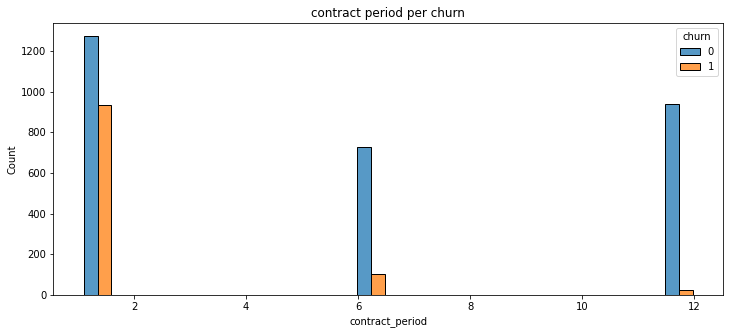

In [64]:
#Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
figure(figsize=(12, 5))
sns.histplot(df, x='contract_period', hue='churn',multiple="dodge", shrink=.8)
plt.title('contract period per churn')
plt.show()

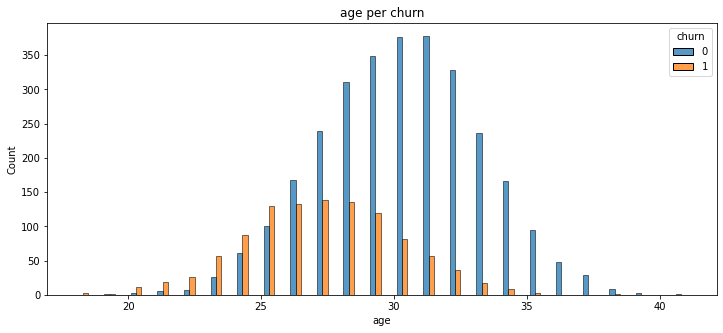

In [65]:
figure(figsize=(12, 5))
sns.histplot(df, x='age', hue='churn',multiple="dodge", shrink=.8)
plt.title('age per churn')
plt.show()

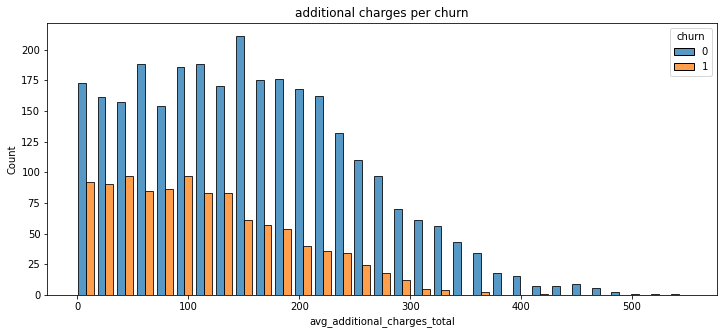

In [66]:
figure(figsize=(12, 5))
sns.histplot(df, x='avg_additional_charges_total', hue='churn',multiple="dodge", shrink=.8)
plt.title('additional charges per churn')
plt.show()

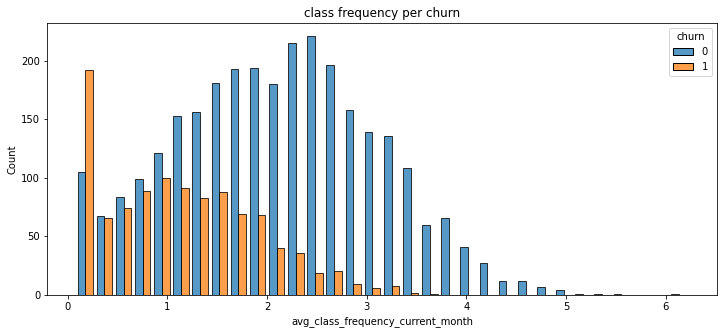

In [67]:
figure(figsize=(12, 5))
sns.histplot(df, x='avg_class_frequency_current_month', hue='churn',multiple="dodge", shrink=.8)
plt.title('class frequency this month per churn')
plt.show()

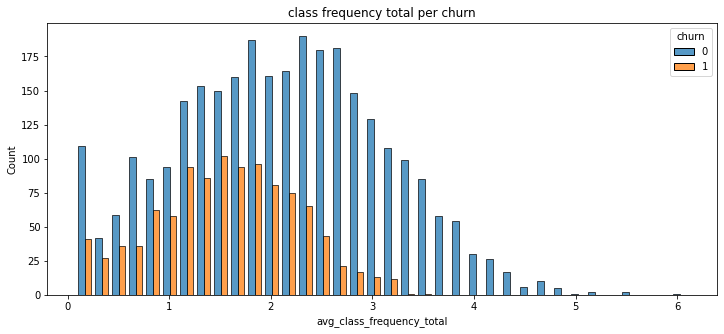

In [68]:
figure(figsize=(12, 5))
sns.histplot(df, x='avg_class_frequency_total', hue='churn',multiple="dodge", shrink=.8)
plt.title('class frequency total per churn')
plt.show()

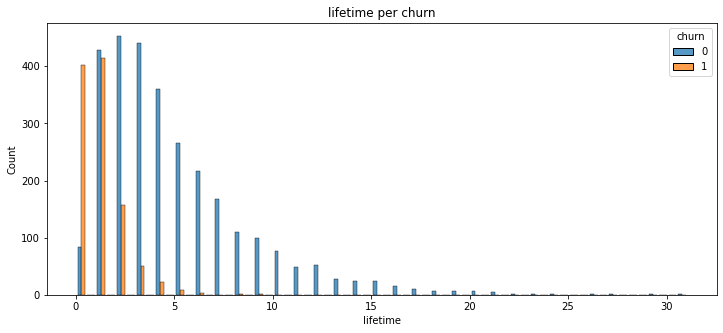

In [69]:
figure(figsize=(12, 5))
sns.histplot(df, x='lifetime', hue='churn',multiple="dodge", shrink=.8)
plt.title('lifetime per churn')
plt.show()

graphs shows us that churn customers has less life time, class frequency, additional charges, they yanger and signed for 1 month contract.

In [13]:
#Build a correlation matrix and display it.
df_heat=df.corr().round(2)

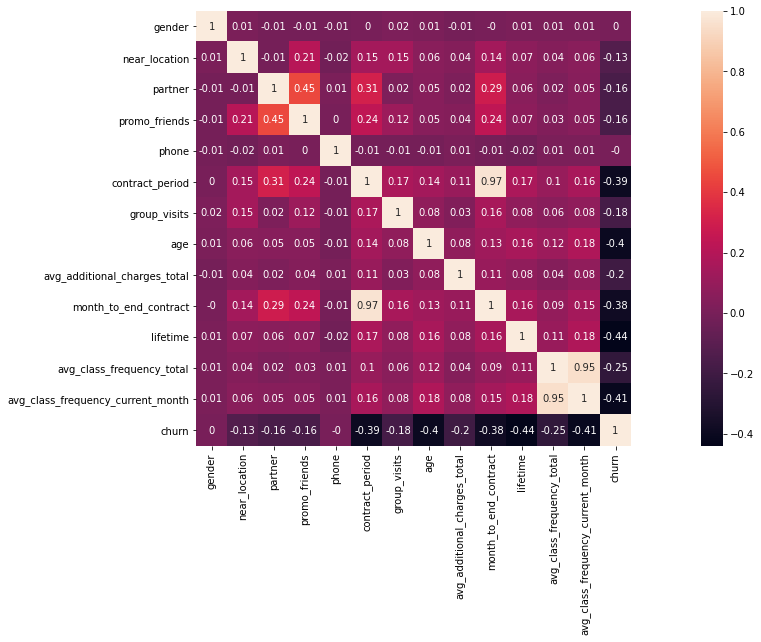

In [41]:
figure(figsize=(25, 8))
sns.heatmap(df_heat, annot = True, square=True)
plt.show()

### Step Build a model to predict user churn <br>
Lets build a binary classification model for customers where the target feature is the user's leaving next month.

In [15]:
# define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [16]:
# divide the data into features (the X matrix) and a target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# define the algorithm for the logistic regression model
lr_model = LogisticRegression(random_state=0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')



# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # write your code here
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st) # write your code here
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] # write your code here
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


model shows, that both methods has same accuracy 92% and its good result. We want to predict customers churn, for that we are interesting for bigger value of recall, that why logistic regression is better option.

### Step Create user clusters <br>
Set aside the column with data on churn and identify object (user) clusters:


In [17]:
# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')

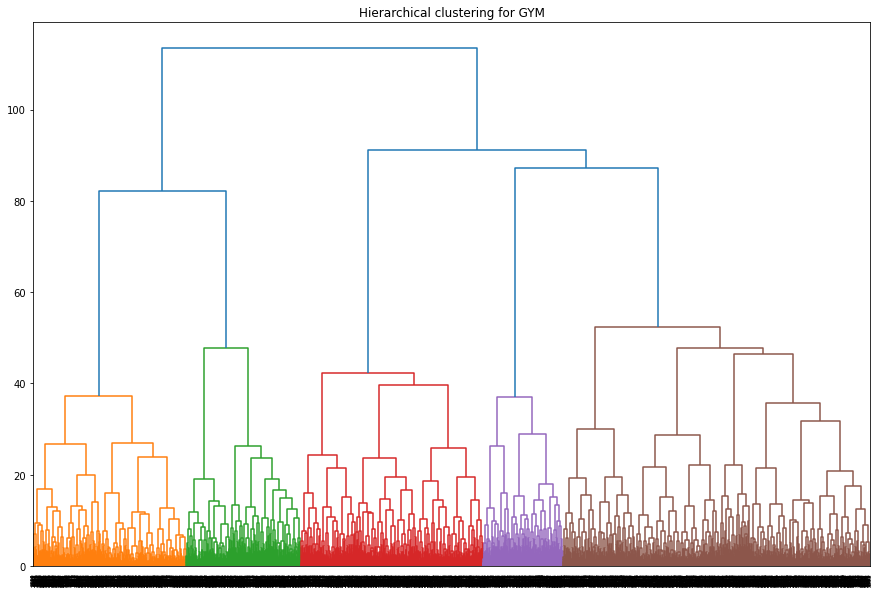

In [18]:
plt.figure(figsize=(15, 10))  
plt.title('Hierarchical clustering for GYM')
dendrogram(linked, orientation='top')
plt.show()

dendrogram shows us that we can make 5 clusters.

In [20]:
km = KMeans(n_clusters = 5) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector 
df['cluster_km']=labels
df_cluster = df.groupby('cluster_km').mean()
df_cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708
1,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872
2,0.470115,0.829885,0.454023,0.263218,1.000000,2.666667,0.386207,30.019540,153.737504,2.483908,4.664368,1.183901,1.183020,0.001149
3,0.505187,0.938797,0.767635,0.561203,1.000000,11.197095,0.559129,29.896266,162.376877,10.237552,4.703320,2.017145,2.011502,0.015560
4,0.553974,0.838671,0.368921,0.209964,0.998814,2.724792,0.436536,29.978648,159.047845,2.511269,4.600237,2.929150,2.935972,0.007117


we can see that cluster #3 is most loyal cluster, more then others use "bring a friend" offer, has longest contract period, like to come to group visits spend more money to additional charges and they are the "old" customers, they have churn close to 0.<br>
and we have the oposite cluster #1 that has lowest values at all this indicators.

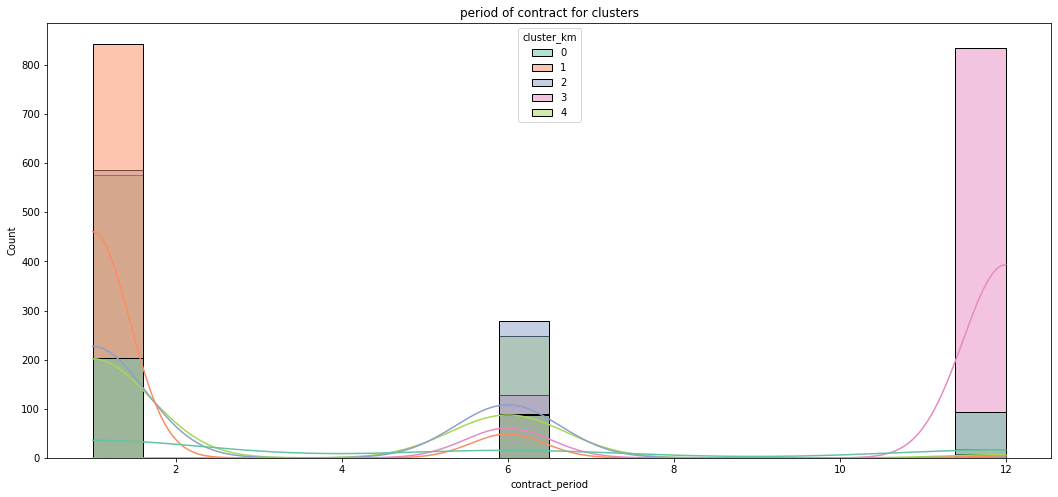

In [56]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='contract_period',
          hue = 'cluster_km', kde=True, palette= "Set2",)
plt.title('period of contract for clusters')
plt.show()

graph shows that most loyal cluster 3 has longest contract - 12 monthes. other cluster less loyal and most of them has 1 month contract.

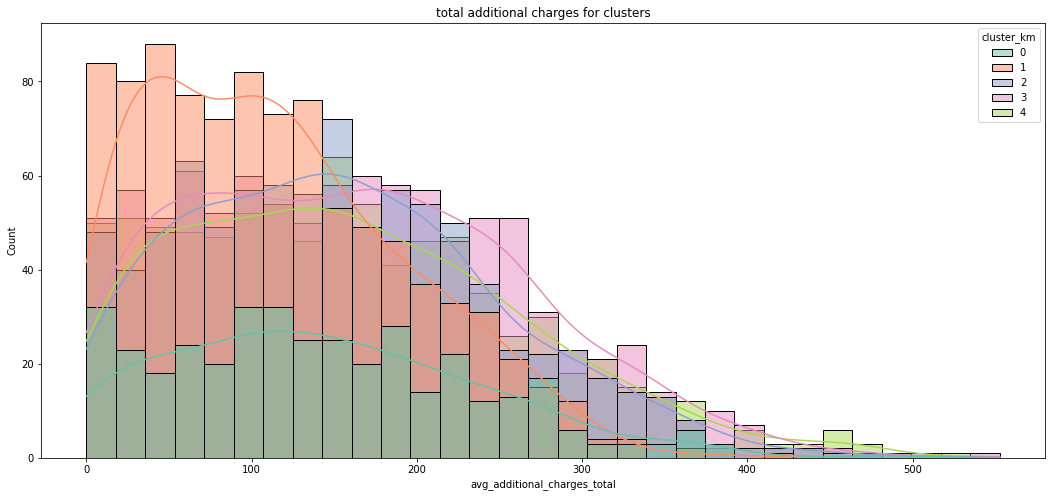

In [50]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='avg_additional_charges_total',
          hue = 'cluster_km', kde=True, palette= "Set2")
plt.title('total additional charges for clusters')
plt.show()

graph shows that usually customers prefer to spend aorund 150$ as additional charges. cluster 3 has biggest value here, others, bigger amount of customers prefer to spend less then cluster #3.

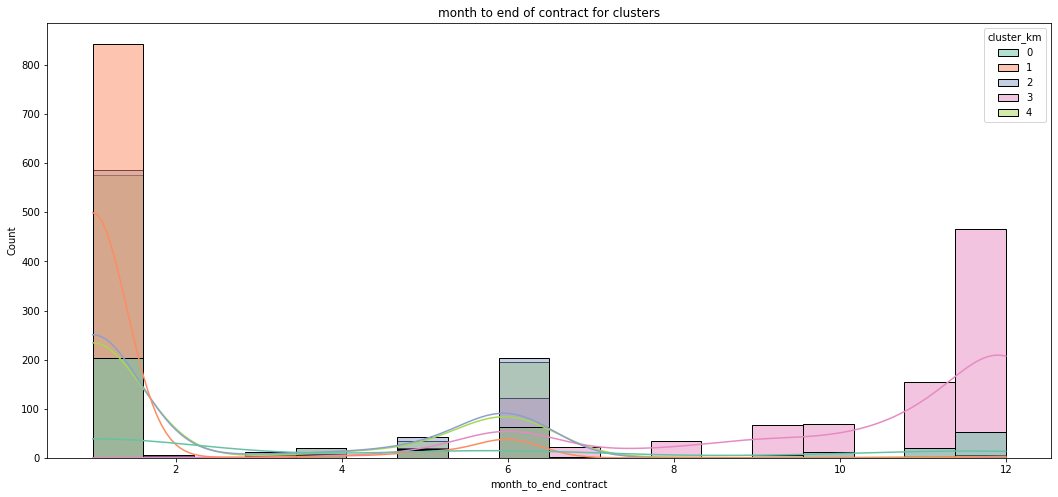

In [49]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='month_to_end_contract',
          hue = 'cluster_km', kde=True, palette= "Set2")
plt.title('month to end of contract for clusters')
plt.show()

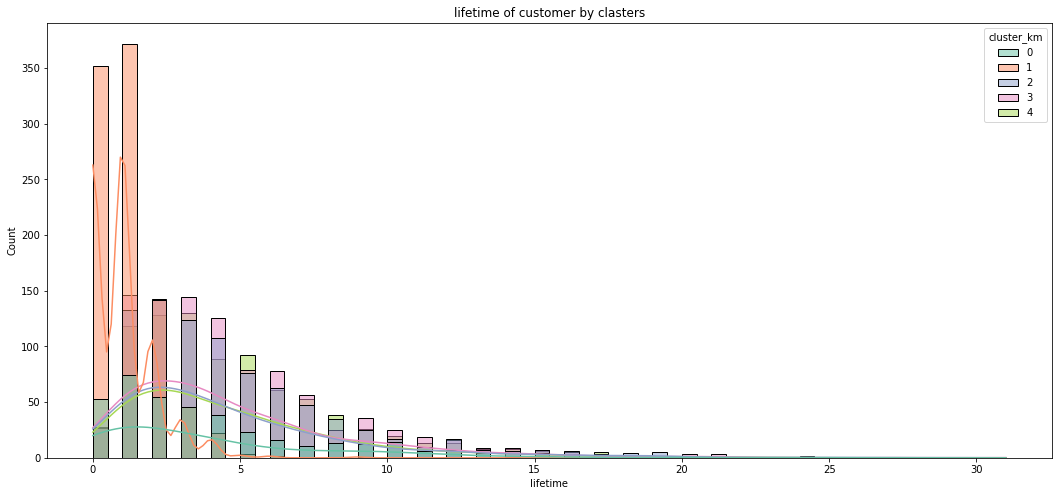

In [48]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='lifetime',
          hue = 'cluster_km', kde=True, palette= "Set2")
plt.title('lifetime of customer by clasters')
plt.show()

graph shows us that most of our customers are new, just 1-2 month with us. most of them in cluster #1.

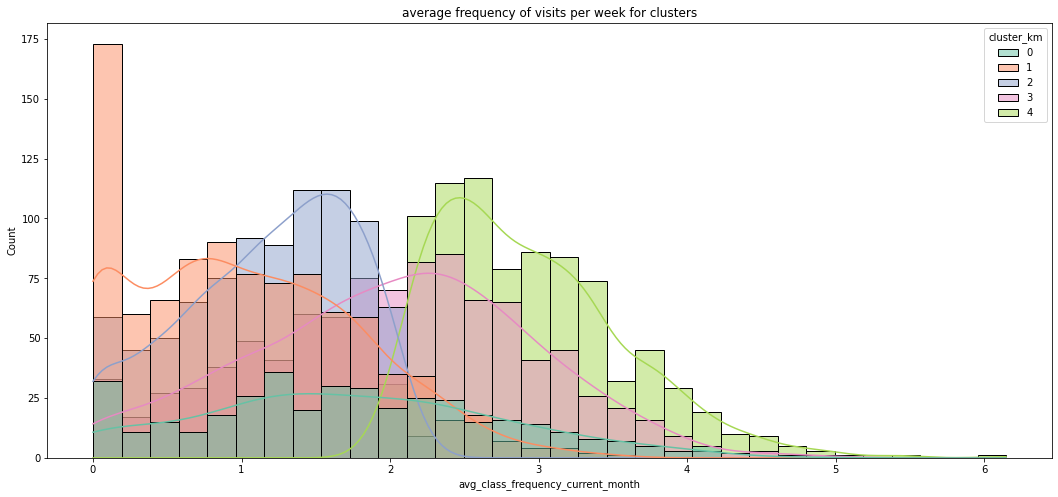

In [47]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='avg_class_frequency_current_month',
          hue = 'cluster_km', kde=True, palette= "Set2")
plt.title('average frequency of visits per week for clusters')
plt.show()

graph shows that usually customers coming 1.5-2 times at week, cluster #4 shows biggest amount of customer frequency. 

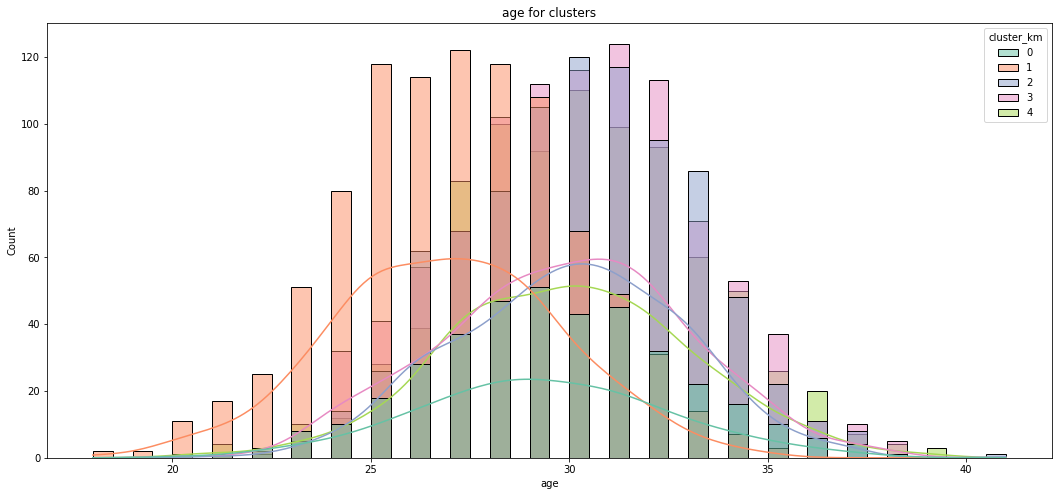

In [62]:
figure(figsize=(18, 8))
sns.histplot(data=df, x='age',
          hue = 'cluster_km', kde=True, palette= "Set2")
plt.title('age for clusters')
plt.show()

most of the customers are 30y.o in average. cluster #1 is yanger then others - 27 y.o.

Calculate the churn rate for each cluster 

In [26]:
#Calculating churn for every cluster
cluster_churn = df.groupby('cluster_km')['churn'].mean().reset_index()

#Formatting churn and printing the result
cluster_churn.churn = cluster_churn.churn.apply(lambda x: "{:.1%}".format(x))
cluster_churn

,cluster_km,churn
0,0,26.4%
1,1,99.8%
2,2,0.1%
3,3,1.6%
4,4,0.7%


In [63]:
df.groupby('cluster_km')['age'].count().reset_index()

,cluster_km,age
0,0,383
1,1,940
2,2,870
3,3,964
4,4,843


Conclusion:<br>
we see that clusters #2,3,4 are very low potential to churn. cluster #1 defenetly churn and cluster #0 is 26% of churn.<br>
Cluster #0: has less then average class frequency for the last month, quete average lifetime of customers, has enough customers with 1,6 and 12 monthes contract, this cluster has less then other vloume of customers.<br>
cluster #1 has bigest churn, yangest customers, lowest class frequency, smallest life time, almost all of the contract is 1 month, the less using partner and promo, they are living more far, they not participate in group class.<br>
cluster #2 almost has no churn, age 30+, they coming almost 2 times at week, average life time, they has mostly 6 month contract, they have strong average additional charges.
cluster #3 most loyal cluster, all of the indicators are high values.
cluster #4 has low change to churn, has biggest class frequancy 2+ per week.

### General conclusion ###

In that project we investigate chain Model Fitness that develop customer interaction strategy based on analytical data.<br>
we analised data, plot graphs and features that helps us predict churn. We build a logistic regression model and trained her. Made a clusters to split our customers for 5 different groups.<br>
we have considered 5 clusters of gym customers and have inference:<br>
as we conclude 2 clusters has a chance to churn, cluster 0 and 1 and more successful cluster 2,3,4 that showing good resulats, compared them, we can say that:<br>
-to prevent it we need to involve that customers to sign 12 month cotract, participate in group visits, use partner and "bring a friend" promo, and push them to spend additional money.<br>
-involve new customers that buy a month contract to stay with us and sign a contract for longer period 6 or 12 monthes.<br>
-push customers to increase class frequency, then more they come then more they stay with us.